<a href="https://colab.research.google.com/github/Manuel-Gomez-05/SenalesySistemas2/blob/main/ejercicio_RLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



***EJERCICIO CON SIMPY API***



In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control

sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace
X = 1/s # Ajustar según tipo de entrada
H=control.TransferFunction(1,L*C*s**2 + R*C*s + 1,s) #Funcion de transferencia con la API de control
#Hlc = H/(1+H) #para lazo cerrado

Y = H.num * X /H.den#función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

          1           
──────────────────────
  ⎛     2            ⎞
s⋅⎝C⋅L⋅s  + C⋅R⋅s + 1⎠

In [2]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp

     C⋅(L⋅s + R)       1
- ────────────────── + ─
       2               s
  C⋅L⋅s  + C⋅R⋅s + 1    

In [3]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

    ⎛ -R⋅t     ⎛     ______________⎞      -R⋅t     ⎛     ______________⎞⎞    
    ⎜ ─────    ⎜    ╱      2       ⎟      ─────    ⎜    ╱      2       ⎟⎟    
    ⎜  2⋅L     ⎜t⋅╲╱  - C⋅R  + 4⋅L ⎟       2⋅L     ⎜t⋅╲╱  - C⋅R  + 4⋅L ⎟⎟    
    ⎜ℯ     ⋅cos⎜───────────────────⎟   R⋅ℯ     ⋅sin⎜───────────────────⎟⎟    
    ⎜          ⎝      2⋅√C⋅L       ⎠               ⎝      2⋅√C⋅L       ⎠⎟    
- C⋅⎜─────────────────────────────── + ─────────────────────────────────⎟ + 1
    ⎜               C                              ______________       ⎟    
    ⎜                                             ╱      2              ⎟    
    ⎝                                        √C⋅╲╱  - C⋅R  + 4⋅L        ⎠    

In [5]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1000, L: sym.Rational('0.00000120'), C: sym.Rational('0.00180')}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt
Ye


         ⎛  3⋅s         ⎞         
       9⋅⎜─────── + 1000⎟         
         ⎝2500000       ⎠        1
- ──────────────────────────── + ─
       ⎛       2             ⎞   s
       ⎜   27⋅s       9⋅s    ⎟    
  5000⋅⎜─────────── + ─── + 1⎟    
       ⎝12500000000    5     ⎠    

**diagrama de polos y ceros**

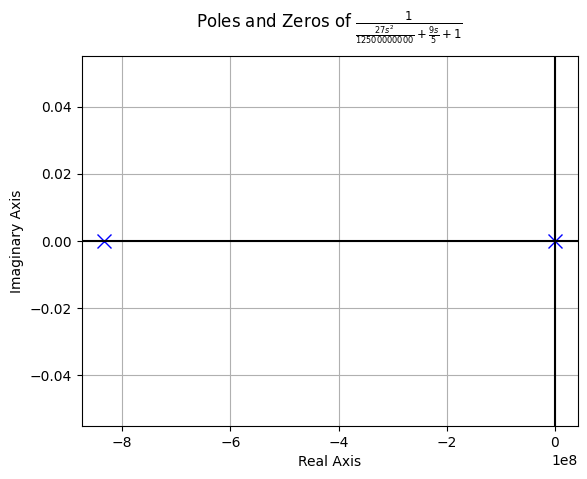

In [6]:

HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.pole_zero_plot(HRLC)

**diagrama de bode**

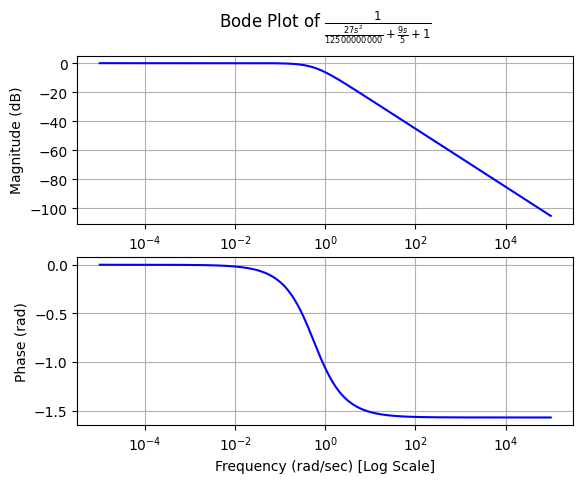

In [7]:
control.bode_plot(HRLC)

**respuesat al impulso**

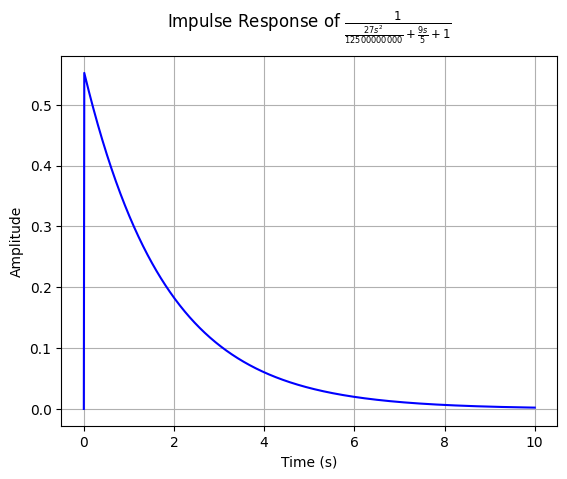

In [8]:
control.impulse_response_plot(HRLC)


**respuesta al escalon**

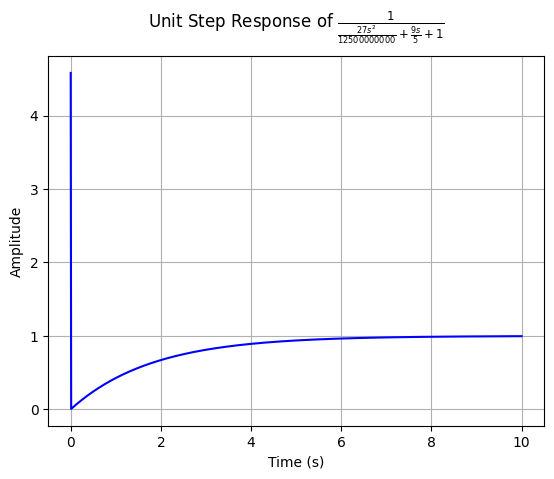

In [9]:

control.step_response_plot(HRLC)

**respuesta a la rampa**

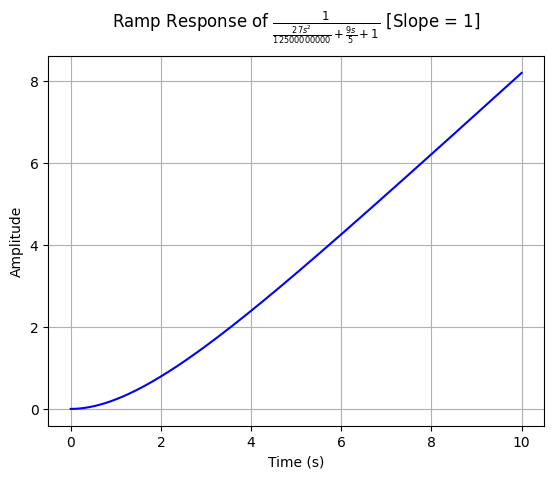

In [10]:

control.ramp_response_plot(HRLC)